# **Task-1:-  Image Denoising, Extract images from video, Process images of a video**

In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
from skimage import restoration, metrics, color, io, util
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error


--- Denoising Evaluation ---
Median Filter -> MSE: 27.3138, PSNR: 0.58, SSIM: 0.0019
Wavelet Filter -> MSE: 29.1528, PSNR: 0.75, SSIM: 0.0012


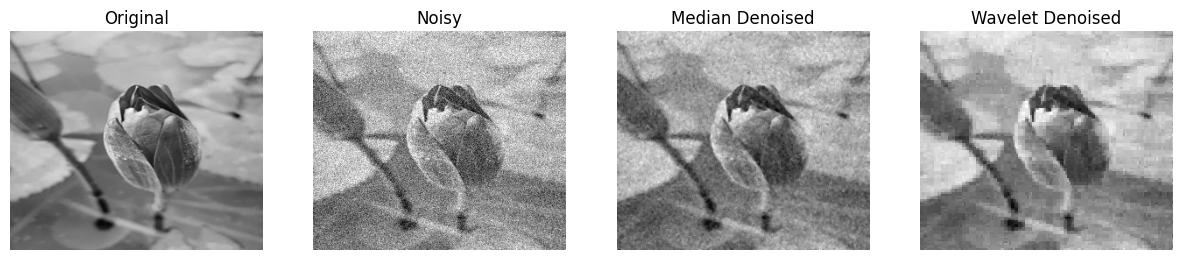

In [ ]:
# Part 1: Image Denoising Methods

def load_grayscale_image(path):
    image = io.imread(path)
    return color.rgb2gray(image)

def add_noise(image):
    return util.random_noise(image, mode='gaussian', var=0.01)

def apply_median_filter(image):
    return cv2.medianBlur((image * 255).astype(np.uint8), 3) / 255.0

def apply_wavelet_filter(image):
    return restoration.denoise_wavelet(image, channel_axis=None, rescale_sigma=True)

def evaluate_metrics(original, denoised):
    if original.dtype != denoised.dtype:
        denoised = denoised.astype(original.dtype)

    data_range = 1.0 if original.max() <= 1.0 else 255

    psnr = peak_signal_noise_ratio(original, denoised, data_range=data_range)
    ssim = structural_similarity(original, denoised, data_range=data_range)
    mse = mean_squared_error(original, denoised)

    return psnr, ssim, mse


def run_denoising_pipeline(image_path):
    image = load_grayscale_image(image_path)
    noisy = add_noise(image)

    median = apply_median_filter(noisy)
    wavelet = apply_wavelet_filter(noisy)

    print("\n--- Denoising Evaluation ---")
    for name, denoised in zip(["Median", "Wavelet"], [median, wavelet]):
        mse, psnr, ssim = evaluate_metrics(image, denoised)
        print(f"{name} Filter -> MSE: {mse:.4f}, PSNR: {psnr:.2f}, SSIM: {ssim:.4f}")

    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original")
    ax[1].imshow(noisy, cmap='gray')
    ax[1].set_title("Noisy")
    ax[2].imshow(median, cmap='gray')
    ax[2].set_title("Median Denoised")
    ax[3].imshow(wavelet, cmap='gray')
    ax[3].set_title("Wavelet Denoised")
    for a in ax: a.axis("off")
    plt.show()

if __name__ == "__main__":
    test_image_path = "/content/flower.jpg"
    run_denoising_pipeline(test_image_path)


--- Denoising Evaluation ---
Median Filter -> MSE: 18.3844, PSNR: 0.32, SSIM: 0.0145
Wavelet Filter -> MSE: 18.4029, PSNR: 0.21, SSIM: 0.0144


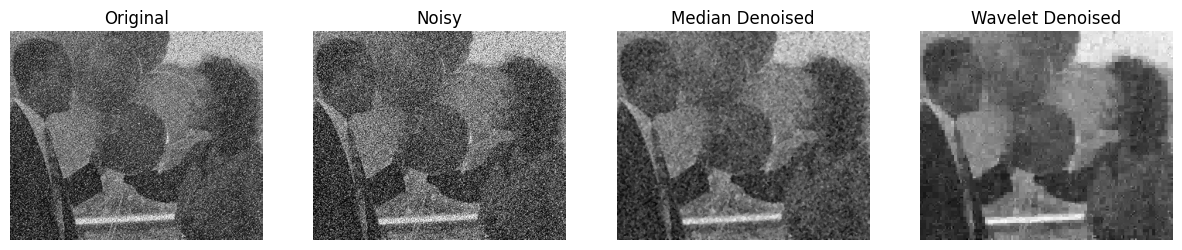

Extracted 658 frames to 'frames'
Processed 658 frames into 'processed_frames'
Video saved as 'processed_video.mp4'
Collage saved as 'collage.jpg'


In [ ]:
# Part 1: Image Denoising Methods

def load_grayscale_image(path):
    image = io.imread(path)
    return color.rgb2gray(image)

def add_noise(image):
    return util.random_noise(image, mode='gaussian', var=0.01)

def apply_median_filter(image):
    return cv2.medianBlur((image * 255).astype(np.uint8), 3) / 255.0

def apply_wavelet_filter(image):
    return restoration.denoise_wavelet(image, channel_axis=None, rescale_sigma=True)

def evaluate_metrics(original, denoised):
    if original.dtype != denoised.dtype:
        denoised = denoised.astype(original.dtype)

    data_range = 1.0 if original.max() <= 1.0 else 255

    psnr = peak_signal_noise_ratio(original, denoised, data_range=data_range)
    ssim = structural_similarity(original, denoised, data_range=data_range)
    mse = mean_squared_error(original, denoised)

    return psnr, ssim, mse


def run_denoising_pipeline(image_path):
    image = load_grayscale_image(image_path)
    noisy = add_noise(image)

    median = apply_median_filter(noisy)
    wavelet = apply_wavelet_filter(noisy)

    print("\n--- Denoising Evaluation ---")
    for name, denoised in zip(["Median", "Wavelet"], [median, wavelet]):
        mse, psnr, ssim = evaluate_metrics(image, denoised)
        print(f"{name} Filter -> MSE: {mse:.4f}, PSNR: {psnr:.2f}, SSIM: {ssim:.4f}")

    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original")
    ax[1].imshow(noisy, cmap='gray')
    ax[1].set_title("Noisy")
    ax[2].imshow(median, cmap='gray')
    ax[2].set_title("Median Denoised")
    ax[3].imshow(wavelet, cmap='gray')
    ax[3].set_title("Wavelet Denoised")
    for a in ax: a.axis("off")
    plt.show()

# Part 2: Extract Images from Video File

def extract_frames(video_path, output_folder="frames"):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_id = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"frame_{frame_id:04d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_id += 1
    cap.release()
    print(f"Extracted {frame_id} frames to '{output_folder}'")

# Part 3: Process Each Video Frame

def process_frames(input_folder="frames", output_folder="processed_frames"):
    os.makedirs(output_folder, exist_ok=True)
    files = sorted([f for f in os.listdir(input_folder) if f.endswith(".jpg")])

    for file in files:
        img = cv2.imread(os.path.join(input_folder, file), 0)

        adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 11, 2)
        gaussian = cv2.GaussianBlur(img, (5, 5), 0)
        canny = cv2.Canny(img, 100, 200)
        bitwise = cv2.bitwise_not(img)

        cv2.imwrite(os.path.join(output_folder, f"adaptive_{file}"), adaptive)
        cv2.imwrite(os.path.join(output_folder, f"gaussian_{file}"), gaussian)
        cv2.imwrite(os.path.join(output_folder, f"canny_{file}"), canny)
        cv2.imwrite(os.path.join(output_folder, f"bitwise_{file}"), bitwise)

    print(f"Processed {len(files)} frames into '{output_folder}'")

# Part 4: Recreate Video from Frames

def recreate_video_from_frames(input_folder="processed_frames", output_path="processed_video.mp4", fps=25):
    frame_files = sorted([f for f in os.listdir(input_folder) if f.endswith(".jpg")])
    first_frame = cv2.imread(os.path.join(input_folder, frame_files[0]))
    height, width = first_frame.shape[:2]

    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for file in frame_files:
        frame = cv2.imread(os.path.join(input_folder, file))
        out.write(frame)

    out.release()
    print(f"Video saved as '{output_path}'")

# Part 5: Create Collage

def create_collage(input_folder="frames", output_path="collage.jpg", rows=5, cols=5):
    files = sorted([f for f in os.listdir(input_folder) if f.endswith(".jpg")])[:rows * cols]
    images = [cv2.resize(cv2.imread(os.path.join(input_folder, f)), (160, 120)) for f in files]

    collage_rows = []
    for r in range(rows):
        row_imgs = images[r * cols:(r + 1) * cols]
        collage_rows.append(np.hstack(row_imgs))
    collage = np.vstack(collage_rows)
    cv2.imwrite(output_path, collage)
    print(f"Collage saved as '{output_path}'")

# Main Driver Function

if __name__ == "__main__":
    video_path = "/content/sample-1.mp4"
    test_image_path = "/content/noisy1.jpg"

    # ---- PART 1: IMAGE DENOISING ----
    run_denoising_pipeline(test_image_path)

    # ---- PART 2: EXTRACT FRAMES ----
    extract_frames(video_path)

    # ---- PART 3: PROCESS FRAMES ----
    process_frames()

    # ---- PART 4: CREATE VIDEO ----
    recreate_video_from_frames()

    # ---- PART 5: CREATE COLLAGE ----
    create_collage()

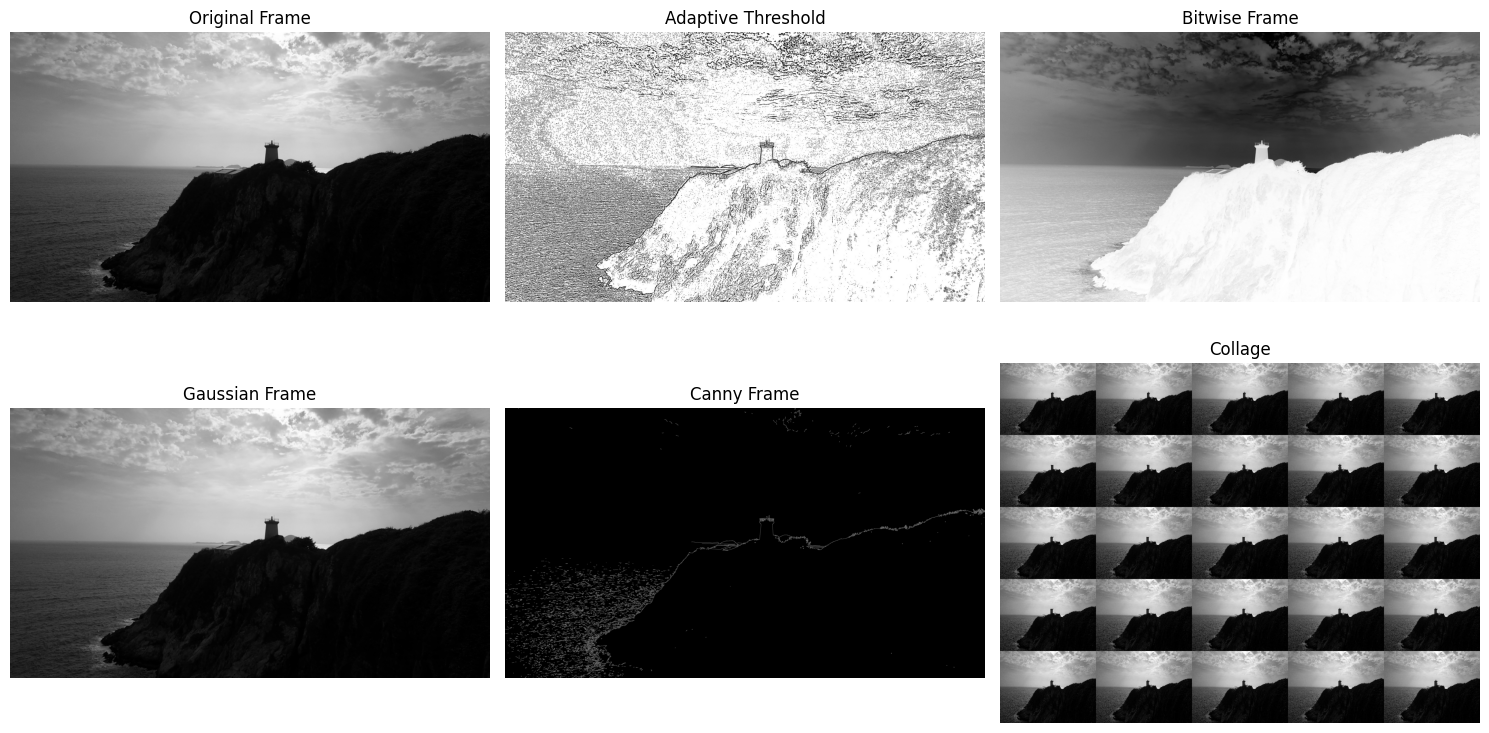

In [ ]:
from PIL import Image

collage = cv2.imread("collage.jpg", cv2.IMREAD_GRAYSCALE)

original_frame = cv2.imread("frames/frame_0000.jpg", cv2.IMREAD_GRAYSCALE)
adaptive_frame = cv2.imread("/content/processed_frames/adaptive_frame_0000.jpg", cv2.IMREAD_GRAYSCALE)
bitwise_frame = cv2.imread("/content/processed_frames/bitwise_frame_0000.jpg", cv2.IMREAD_GRAYSCALE)
gaussian_frame = cv2.imread("/content/processed_frames/gaussian_frame_0000.jpg", cv2.IMREAD_GRAYSCALE)
canny_frame = cv2.imread("/content/processed_frames/canny_frame_0000.jpg", cv2.IMREAD_GRAYSCALE)

titles = ['Original Frame', 'Adaptive Threshold', 'Bitwise Frame', 'Gaussian Frame', 'Canny Frame', 'Collage']
frames = [original_frame, adaptive_frame, bitwise_frame, gaussian_frame, canny_frame, collage]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(frames[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()